In [59]:
#Aula 1 - Análise de Dados com Pandas

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [62]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [64]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [65]:
df.shape

(133349, 11)

In [66]:
linhas, colunas = df.shape[0], df.shape[1]

print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


In [67]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [68]:
renomear_coluna = {
    'work_year': 'ano',
    'experience_level': 'nivel_de_experiencia',
    'employment_type': 'tipo_de_contratacao',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_do_salario',
    'salary_in_usd': 'salario_em_usd',
    'employee_residence': 'residencia_do_funcionario',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao_da_empresa',
    'company_size': 'tamanho_da_empresa'
}

df.rename(columns=renomear_coluna, inplace=True)
df.columns

Index(['ano', 'nivel_de_experiencia', 'tipo_de_contratacao', 'cargo',
       'salario', 'moeda_do_salario', 'salario_em_usd',
       'residencia_do_funcionario', 'remoto', 'localizacao_da_empresa',
       'tamanho_da_empresa'],
      dtype='object')

In [69]:
df['nivel_de_experiencia'].value_counts()

nivel_de_experiencia
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [70]:
df['tipo_de_contratacao'].value_counts()

tipo_de_contratacao
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [71]:
df['remoto'].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [72]:
df['tamanho_da_empresa'].value_counts()

tamanho_da_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [73]:
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['nivel_de_experiencia'] = df['nivel_de_experiencia'].replace(senioridade)

df['nivel_de_experiencia'].value_counts()

nivel_de_experiencia
Senior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [74]:
tipo_contrato = {
    'FT': 'Integral',
    'CT': 'PJ',
    'PT': 'Meio-Periodo',
    'FL': 'Free Lancer'
}

df['tipo_de_contratacao'] = df['tipo_de_contratacao'].replace(tipo_contrato)

df['tipo_de_contratacao'].value_counts()

tipo_de_contratacao
Integral        132563
PJ                 394
Meio-Periodo       376
Free Lancer         16
Name: count, dtype: int64

In [75]:
tamanho_empresa = {
    'M': 'Media',
    'L': 'Grande',
    'S': 'Pequena'
}

df['tamanho_da_empresa'] = df['tamanho_da_empresa'].replace(tamanho_empresa)

df['tamanho_da_empresa'].value_counts()


tamanho_da_empresa
Media      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [76]:
modelo_trabalho = {
    0 : 'Presencial',
    100: 'Remoto',
    50 : 'Hibrido'
}

df['remoto'] = df['remoto'].replace(modelo_trabalho)

df['remoto'].value_counts()

remoto
Presencial    105312
Remoto         27718
Hibrido          319
Name: count, dtype: int64

In [77]:
df.head()

,ano,nivel_de_experiencia,tipo_de_contratacao,cargo,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,remoto,localizacao_da_empresa,tamanho_da_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [78]:
df.describe(include="object")

,nivel_de_experiencia,tipo_de_contratacao,cargo,moeda_do_salario,residencia_do_funcionario,remoto,localizacao_da_empresa,tamanho_da_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [79]:
df.describe()

,ano,salario,salario_em_usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [80]:
#Aula 2 - Preparação e limpeza dos Dados

In [81]:
df.isnull()

,ano,nivel_de_experiencia,tipo_de_contratacao,cargo,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,remoto,localizacao_da_empresa,tamanho_da_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [82]:
df.isnull().sum()

ano                          10
nivel_de_experiencia          0
tipo_de_contratacao           0
cargo                         0
salario                       0
moeda_do_salario              0
salario_em_usd                0
residencia_do_funcionario     0
remoto                        0
localizacao_da_empresa        0
tamanho_da_empresa            0
dtype: int64

In [83]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [84]:
df[df.isnull().any(axis=1)]

,ano,nivel_de_experiencia,tipo_de_contratacao,cargo,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,remoto,localizacao_da_empresa,tamanho_da_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


In [85]:
import numpy as np

df_salarios = pd.DataFrame({
    'nomed': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salarios': [4000, np.nan, 5000, np.nan, 100000]
})

df_salarios['salario_media'] = df_salarios['salarios'].fillna(df_salarios['salarios'].mean().round(2))

df_salarios['salario_mediana'] = df_salarios['salarios'].fillna(df_salarios['salarios'].median().round(2))


df_salarios

,nomed,salarios,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [86]:
df_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta','Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()

df_temperaturas


,dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [87]:
df_temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta','Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()

df_temperaturas


,dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [88]:
df_cidades = pd.DataFrame({
    'nomes': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna("Não informado")

df_cidades


,nomes,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [89]:
df_limpo = df.dropna()

In [90]:
df_limpo.isnull().sum()

ano                          0
nivel_de_experiencia         0
tipo_de_contratacao          0
cargo                        0
salario                      0
moeda_do_salario             0
salario_em_usd               0
residencia_do_funcionario    0
remoto                       0
localizacao_da_empresa       0
tamanho_da_empresa           0
dtype: int64

In [91]:
df_limpo.head()

,ano,nivel_de_experiencia,tipo_de_contratacao,cargo,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,remoto,localizacao_da_empresa,tamanho_da_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [92]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ano                        133339 non-null  float64
 1   nivel_de_experiencia       133339 non-null  object 
 2   tipo_de_contratacao        133339 non-null  object 
 3   cargo                      133339 non-null  object 
 4   salario                    133339 non-null  int64  
 5   moeda_do_salario           133339 non-null  object 
 6   salario_em_usd             133339 non-null  int64  
 7   residencia_do_funcionario  133339 non-null  object 
 8   remoto                     133339 non-null  object 
 9   localizacao_da_empresa     133339 non-null  object 
 10  tamanho_da_empresa         133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [93]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [94]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ano                        133339 non-null  int64 
 1   nivel_de_experiencia       133339 non-null  object
 2   tipo_de_contratacao        133339 non-null  object
 3   cargo                      133339 non-null  object
 4   salario                    133339 non-null  int64 
 5   moeda_do_salario           133339 non-null  object
 6   salario_em_usd             133339 non-null  int64 
 7   residencia_do_funcionario  133339 non-null  object
 8   remoto                     133339 non-null  object
 9   localizacao_da_empresa     133339 non-null  object
 10  tamanho_da_empresa         133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [95]:
df_limpo.head()

,ano,nivel_de_experiencia,tipo_de_contratacao,cargo,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,remoto,localizacao_da_empresa,tamanho_da_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [96]:
#Aula 3 - Visualização de Dados

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='nivel_de_experiencia'>

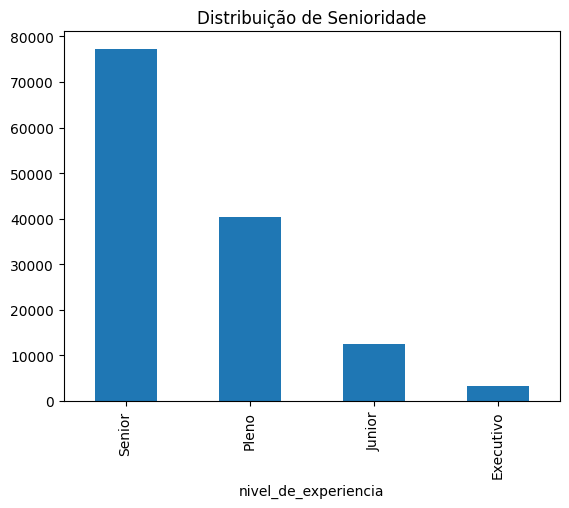

In [97]:
df_limpo['nivel_de_experiencia'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='nivel_de_experiencia', ylabel='salario_em_usd'>

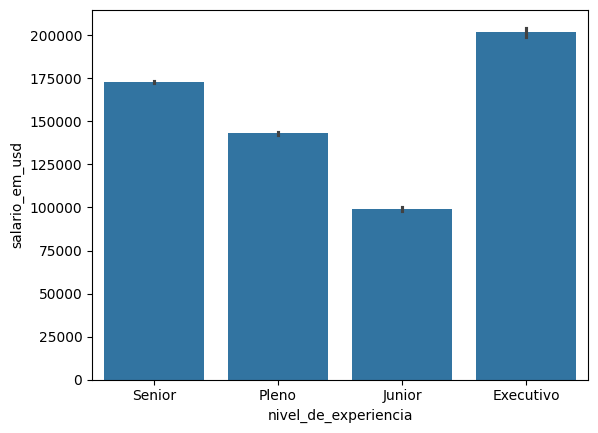

In [99]:
sns.barplot( data=df_limpo, x= df_limpo['nivel_de_experiencia'], y= df_limpo['salario_em_usd'])

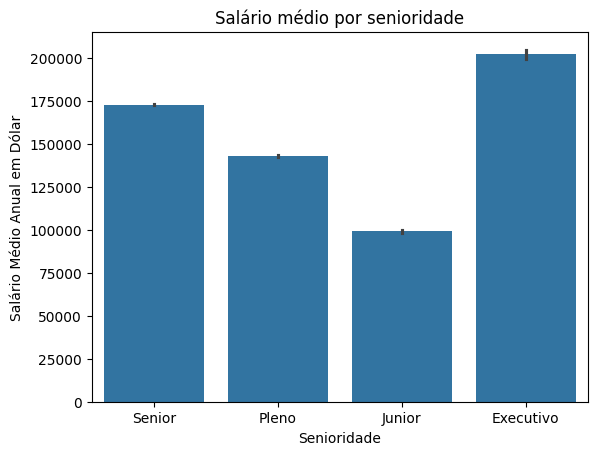

In [100]:
plt.Figure(figsize=(8, 5))
sns.barplot( data=df_limpo, x= df_limpo['nivel_de_experiencia'], y= df_limpo['salario_em_usd'])
plt.title('Salário médio por senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual em Dólar")
plt.show()

In [101]:
df_limpo.groupby('nivel_de_experiencia')['salario_em_usd'].mean().sort_values(ascending=False)


nivel_de_experiencia
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: salario_em_usd, dtype: float64

In [102]:
ordem = df_limpo.groupby('nivel_de_experiencia')['salario_em_usd'].mean().sort_values(ascending=True).index

In [103]:
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='nivel_de_experiencia')

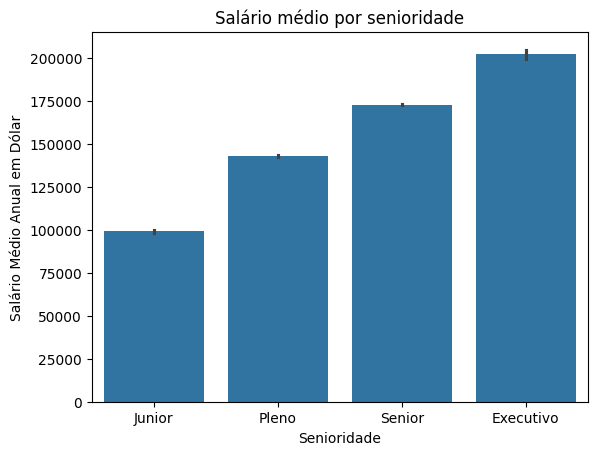

In [104]:
plt.Figure(figsize=(8, 5))
sns.barplot( data=df_limpo, x= df_limpo['nivel_de_experiencia'], y= df_limpo['salario_em_usd'], order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel("Senioridade")
plt.ylabel("Salário Médio Anual em Dólar")
plt.show()

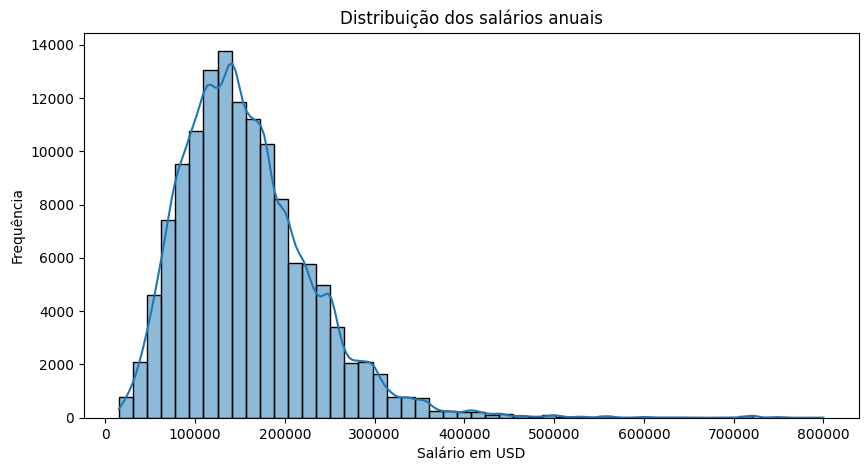

In [113]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['salario_em_usd'], bins=50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

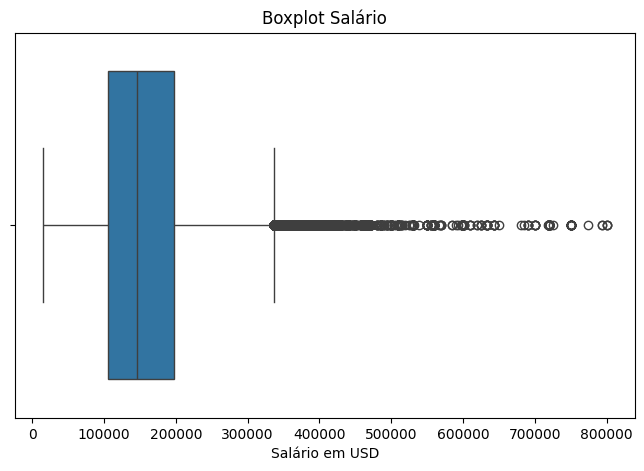

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df_limpo['salario_em_usd'])
plt.title('Boxplot Salário')
plt.xlabel("Salário em USD")
plt.show()

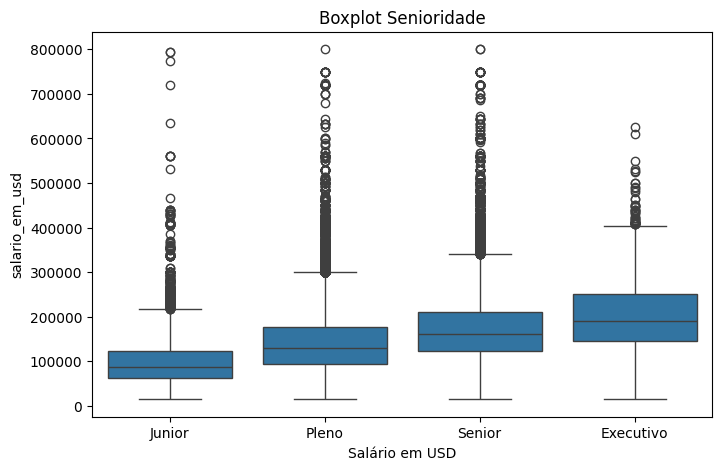

In [125]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='nivel_de_experiencia', y='salario_em_usd', data=df_limpo, order = ordem_senioridade)
plt.title('Boxplot Senioridade')
plt.xlabel("Salário em USD")
plt.show()

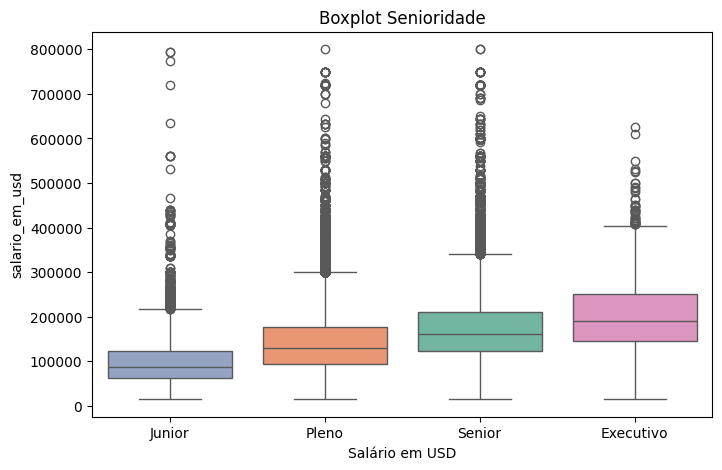

In [126]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='nivel_de_experiencia', y='salario_em_usd', data=df_limpo, order = ordem_senioridade, palette='Set2', hue='nivel_de_experiencia')
plt.title('Boxplot Senioridade')
plt.xlabel("Salário em USD")
plt.show()

In [144]:
import plotly.express as px
import plotly.io as pio

In [145]:
media_salarial_senioridade = df_limpo.groupby('nivel_de_experiencia')['salario_em_usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(media_salarial_senioridade,
             x='nivel_de_experiencia',
             y= 'salario_em_usd',
             title='Média salarial por senioridade',
             labels={'nivel_de_experiencia': 'Nível de Senioridade', 'salario_em_usd': 'Média Salarial Anual (USD)'})
fig.show(renderer='browser')


In [151]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values= 'quantidade',
             title='Proporção por tipo de trabalho',
             hole = 1)
fig.show(renderer='browser')